# Part I - (Prosper Loan Dataset Exploration )
## by (Quadri Omotesho)

## Introduction
>The data set is named Prosper Loan Data. There are 113937 rows and 81 columns in the dataset. It is a datasets showing information about the borrowers and lenders of loan. It also include information about investors, credit scores and interest rates among others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_df.shape

(113937, 81)

In [4]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [7]:
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## Preliminary Wrangling
> 7 issues were identified and cleaned

## Issue_1: Creating a subset of the dataset
> Since it is not feasible to work on the entire column, I will be creating a subset of the dataset with the columns that interest me. 

## Code

In [8]:
 column_subset = ['LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'IncomeRange', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)',
        'ListingCategory (numeric)', 'IsBorrowerHomeowner' ]
loan_subs = loan_df[column_subset]

## Test

In [9]:
loan_subs.shape

(113937, 10)

In [10]:
loan_subs.sample(20)

,LoanStatus,BorrowerRate,EmploymentStatus,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha),ListingCategory (numeric),IsBorrowerHomeowner
18184,Completed,0.1825,Full-time,"$25,000-49,999",0.30,1500,36,NaN,0,False
13947,Completed,0.1444,Not available,Not displayed,0.25,7500,36,NaN,0,False
50783,Defaulted,0.2500,Not available,Not displayed,0.13,2500,36,NaN,0,False
109314,Current,0.1715,Employed,"$50,000-74,999",0.12,6500,60,C,15,True
80178,Past Due (31-60 days),0.0649,Employed,"$100,000+",0.15,22000,36,AA,1,True
88287,Current,0.2786,Employed,"$75,000-99,999",0.35,4000,36,E,7,True
498,Completed,0.1800,Not available,Not displayed,0.10,5000,36,NaN,0,False
38326,Completed,0.1248,Full-time,"$1-24,999",0.47,7000,36,NaN,0,False
3154,Current,0.1875,Other,"$25,000-49,999",0.30,10000,60,C,1,False
80966,Defaulted,0.2974,Full-time,"$100,000+",0.11,7500,36,NaN,2,True


**The subset created has 10 columns and 113937 rows**

In [11]:
loan_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   BorrowerRate               113937 non-null  float64
 2   EmploymentStatus           111682 non-null  object 
 3   IncomeRange                113937 non-null  object 
 4   DebtToIncomeRatio          105383 non-null  float64
 5   LoanOriginalAmount         113937 non-null  int64  
 6   Term                       113937 non-null  int64  
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   IsBorrowerHomeowner        113937 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 7.9+ MB


In [12]:
loan_subs.isnull().sum()

LoanStatus                       0
BorrowerRate                     0
EmploymentStatus              2255
IncomeRange                      0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
Term                             0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
IsBorrowerHomeowner              0
dtype: int64

## Issue_2 : Removing the rows with null ProsperRating(Alpha)
> ProsperRating Alpha is one the important columns that is interesting to me, hence I will remove the rows without ProsperRating

## Code

In [13]:
loan_subs= loan_subs[loan_subs['ProsperRating (Alpha)'].notnull()]

## Test

In [14]:
loan_subs.isnull().sum()

LoanStatus                      0
BorrowerRate                    0
EmploymentStatus                0
IncomeRange                     0
DebtToIncomeRatio            7296
LoanOriginalAmount              0
Term                            0
ProsperRating (Alpha)           0
ListingCategory (numeric)       0
IsBorrowerHomeowner             0
dtype: int64

## Issue_3: Filling the empty DebtToIncome Ratio with the mean

## Code

In [15]:
loan_subs['DebtToIncomeRatio']=loan_subs['DebtToIncomeRatio'].fillna(loan_subs['DebtToIncomeRatio'].mean())

## Test

In [16]:
loan_subs.isnull().sum()

LoanStatus                   0
BorrowerRate                 0
EmploymentStatus             0
IncomeRange                  0
DebtToIncomeRatio            0
LoanOriginalAmount           0
Term                         0
ProsperRating (Alpha)        0
ListingCategory (numeric)    0
IsBorrowerHomeowner          0
dtype: int64

In [17]:
loan_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanStatus                 84853 non-null  object 
 1   BorrowerRate               84853 non-null  float64
 2   EmploymentStatus           84853 non-null  object 
 3   IncomeRange                84853 non-null  object 
 4   DebtToIncomeRatio          84853 non-null  float64
 5   LoanOriginalAmount         84853 non-null  int64  
 6   Term                       84853 non-null  int64  
 7   ProsperRating (Alpha)      84853 non-null  object 
 8   ListingCategory (numeric)  84853 non-null  int64  
 9   IsBorrowerHomeowner        84853 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 6.6+ MB


In [18]:
loan_subs.nunique()

LoanStatus                     11
BorrowerRate                 1229
EmploymentStatus                7
IncomeRange                     7
DebtToIncomeRatio             260
LoanOriginalAmount           1934
Term                            3
ProsperRating (Alpha)           7
ListingCategory (numeric)      20
IsBorrowerHomeowner             2
dtype: int64

## Issue_4: Converting the ProsperRating(Alpha) data type to an ordinal categorical type

## Code

In [19]:
P_rating = ['AA','A','B','C','D','E','HR']
P_ordinal = pd.api.types.CategoricalDtype(ordered = True, categories = P_rating)
loan_subs['ProsperRating'] = loan_subs['ProsperRating (Alpha)'].astype(P_ordinal)
loan_subs.drop(['ProsperRating (Alpha)'], axis=1, inplace=True)

## Test

In [20]:
loan_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanStatus                 84853 non-null  object  
 1   BorrowerRate               84853 non-null  float64 
 2   EmploymentStatus           84853 non-null  object  
 3   IncomeRange                84853 non-null  object  
 4   DebtToIncomeRatio          84853 non-null  float64 
 5   LoanOriginalAmount         84853 non-null  int64   
 6   Term                       84853 non-null  int64   
 7   ListingCategory (numeric)  84853 non-null  int64   
 8   IsBorrowerHomeowner        84853 non-null  bool    
 9   ProsperRating              84853 non-null  category
dtypes: bool(1), category(1), float64(2), int64(3), object(3)
memory usage: 6.0+ MB


## Issue_5 : Converting the numeric variable of the Listing Category to its strings.

## Code

In [21]:
categ_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_subs['ListingCategory'] = loan_subs['ListingCategory (numeric)'].map(categ_dict)
loan_subs.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

## Test

In [22]:
loan_subs.sample(20)

,LoanStatus,BorrowerRate,EmploymentStatus,IncomeRange,DebtToIncomeRatio,LoanOriginalAmount,Term,IsBorrowerHomeowner,ProsperRating,ListingCategory
77865,Past Due (1-15 days),0.3177,Employed,"$1-24,999",0.680000,4000,36,False,HR,Debt Consolidation
36645,Current,0.2139,Employed,"$100,000+",0.070000,12000,60,False,C,Debt Consolidation
16355,Past Due (61-90 days),0.1699,Employed,"$100,000+",0.160000,7000,36,True,C,Debt Consolidation
47542,Current,0.1299,Employed,"$25,000-49,999",0.360000,4000,36,True,A,Debt Consolidation
20399,Completed,0.1499,Employed,"$100,000+",0.130000,2000,12,False,B,Debt Consolidation
54193,Completed,0.0947,Employed,"$25,000-49,999",0.300000,8630,12,False,A,Debt Consolidation
73401,Current,0.1940,Other,"$1-24,999",0.550000,4000,36,False,C,Debt Consolidation
65295,Current,0.1626,Employed,"$75,000-99,999",0.170000,5000,36,False,B,Other
11143,Current,0.3134,Employed,"$25,000-49,999",0.410000,4000,36,False,HR,Debt Consolidation
109535,Current,0.1765,Other,"$50,000-74,999",0.570000,15000,36,True,C,Debt Consolidation


In [23]:
loan_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   LoanStatus           84853 non-null  object  
 1   BorrowerRate         84853 non-null  float64 
 2   EmploymentStatus     84853 non-null  object  
 3   IncomeRange          84853 non-null  object  
 4   DebtToIncomeRatio    84853 non-null  float64 
 5   LoanOriginalAmount   84853 non-null  int64   
 6   Term                 84853 non-null  int64   
 7   IsBorrowerHomeowner  84853 non-null  bool    
 8   ProsperRating        84853 non-null  category
 9   ListingCategory      84853 non-null  object  
dtypes: bool(1), category(1), float64(2), int64(2), object(4)
memory usage: 6.0+ MB


## Issue_6: Converting the IncomeRange from an integer to an ordinal categorical variable.

## Code

In [24]:
Inc_rating = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
Inc_ordinal = pd.api.types.CategoricalDtype(ordered = True, categories = Inc_rating)
loan_subs['Income_range'] = loan_subs['IncomeRange'].astype(Inc_ordinal)
loan_subs.drop(['IncomeRange'], axis=1, inplace=True)

## Test

In [25]:
loan_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   LoanStatus           84853 non-null  object  
 1   BorrowerRate         84853 non-null  float64 
 2   EmploymentStatus     84853 non-null  object  
 3   DebtToIncomeRatio    84853 non-null  float64 
 4   LoanOriginalAmount   84853 non-null  int64   
 5   Term                 84853 non-null  int64   
 6   IsBorrowerHomeowner  84853 non-null  bool    
 7   ProsperRating        84853 non-null  category
 8   ListingCategory      84853 non-null  object  
 9   Income_range         84853 non-null  category
dtypes: bool(1), category(2), float64(2), int64(2), object(3)
memory usage: 5.4+ MB


## Issue_7 : Converting the Loan term to categorical data type since there are only 3 options

## Code

In [26]:
Term_dict = {12 : '1 year', 36 : '3 years', 60 : '5 years'}

loan_subs['Terms'] = loan_subs['Term'].map(Term_dict)
loan_subs.drop(['Term'], axis=1, inplace=True)

In [27]:
 loan_subs['Terms'] = loan_subs['Terms'].astype('category')

## Test

In [28]:
loan_subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   LoanStatus           84853 non-null  object  
 1   BorrowerRate         84853 non-null  float64 
 2   EmploymentStatus     84853 non-null  object  
 3   DebtToIncomeRatio    84853 non-null  float64 
 4   LoanOriginalAmount   84853 non-null  int64   
 5   IsBorrowerHomeowner  84853 non-null  bool    
 6   ProsperRating        84853 non-null  category
 7   ListingCategory      84853 non-null  object  
 8   Income_range         84853 non-null  category
 9   Terms                84853 non-null  category
dtypes: bool(1), category(3), float64(2), int64(1), object(3)
memory usage: 4.9+ MB


In [29]:
loan_subs['Terms']. value_counts()

3 years    58695
5 years    24545
1 year      1613
Name: Terms, dtype: int64

### What is the structure of your dataset?

> The subset (loan_subs) has 84853 rows and 11 columns. I have also converted some columns such as ProsperRating and Income_range into ordered categorical type. The dataset does not have any null  or duplicated values.

### What is/are the main feature(s) of interest in your dataset?
> As a Potential Borrower,
* I am interested in finding out the factors that influence the Interest rates
* I am also interested in finding out basic information such as
    *  What is the most common Loan Term
    *  For what needs are most loans given out
    *  What amount of loans are usually given out
    *  Does Employment Status influence the amount loan amount?
> NB: This is not an exhaustive list.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Of course there are many columns in the dataset that can help answer the above questions. This includes;
1. DebToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled.
2. IncomeRange - The income range of the borrower at the time the listing was created.
3. ProsperRating - The Prosper Rating assigned at the time the listing was created between AA-HR with AA being the highest and HR being the lowest. Applicable for loans originated after July 2009.
4. Owning a house as a form of Collateral:A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
5. Employment status: The employment status of the borrower at the time they posted the listing.


In [30]:
categ_list = loan_df['ListingCategory (numeric)'].value_counts()[:10]

## Univariate Exploration

## Question 1- 
> The first question I will like to know is What is the most common loan term? 

## Visualization

In [31]:
base_color = sb.color_palette()[1]

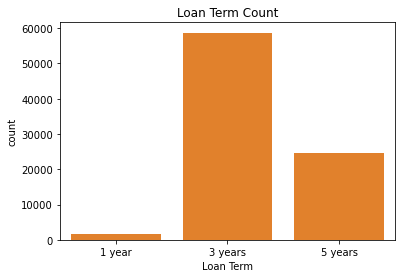

In [32]:
sb.countplot(data = loan_subs, x = 'Terms', color = base_color);
plt.ylabel('count')
plt.xlabel('Loan Term')
plt.title('Loan Term Count');

## Observation
> There are three main loan term short-term(12 months), medium-term(36 months), long-term(60months). The majority of the loans is given for medium term- 3 years

## Question 2
> What is the distribution of the borrower's interest rate

## Visualization

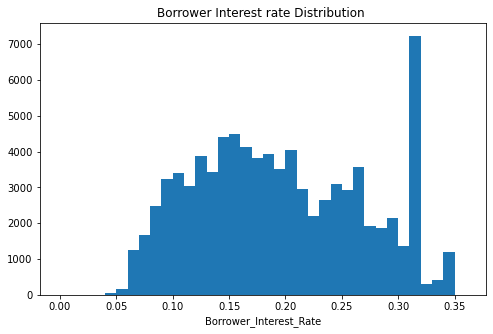

In [33]:
binsize = 0.01
bins = np.arange(0, loan_subs['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = loan_subs, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower_Interest_Rate')
plt.title('Borrower Interest rate Distribution ')
plt.show();

### Observation
> Normally as a potential borrower, I will want a lower interest rate, The above distribution shows that the most recurring interest rate is between 30-35%

## Question 3
> Furthermore, I will like to have an idea of the loan status trend to see if ProsperLoan has a good loaning profile

## Visualization

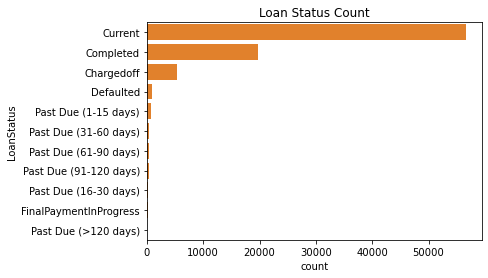

In [34]:
stats_order = loan_subs['LoanStatus'].value_counts().index
sb.countplot(data = loan_subs, y = 'LoanStatus', color = base_color, order = stats_order);
plt.xlabel('count')
plt.ylabel('LoanStatus')
plt.title('Loan Status Count');

***Improving plots by making transformation in the data types and grouping the Past Dues together***

In [35]:
#First grouping all Past Dues to appear only as Past Due
loan_subs['LoanStatus'] = loan_subs['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
stat_order = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_stat_order = pd.api.types.CategoricalDtype(ordered = True, categories = stat_order)

loan_subs['LoanStatus'] = loan_subs['LoanStatus'].astype(loan_stat_order)

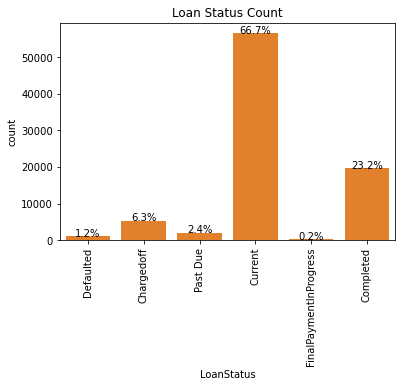

In [36]:
# Getting the proportion of each categorical variable

n_status=loan_subs['LoanStatus'].value_counts().sum()
status_count = loan_subs['LoanStatus'].value_counts()
status_order=status_count.index

sb.countplot(data=loan_subs, x='LoanStatus', color=base_color, order=stat_order);
plt.title('Loan Status Count')
# getting the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# looping through each pair of locations and labels
for loc, label in zip(locs, labels):
    # getting  the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_status)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## Observation

The current loans make up 66.7% of total loans while the completed loans make up 23.2% indicating that ProsperLoan has a good profile. The defaulted and charged loans account for less than 10% of the dataset.

## Question 4
> As a borrower, I will want to know the employment status that receives the largest loans. What is the employment status of the borrowers population?

## Visualization

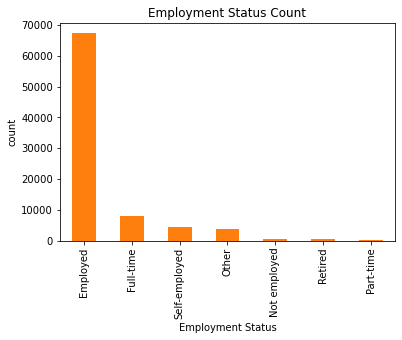

In [37]:
loan_subs['EmploymentStatus'].value_counts().plot(kind='bar', color = base_color)
plt.xlabel('Employment Status')
plt.ylabel('count')
plt.title('Employment Status Count');

## Observation
> We see that the employed individuals are given more loans compared to self employed borrowers. Also people with full time jobs get more loans than the people working part-time.

## Question 5
> As a borrower, I will like to know the common loan amount given out to borrowers inorder to know the limits I can request for

## Visualization

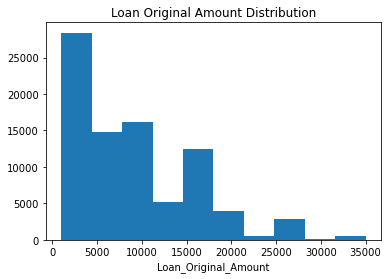

In [38]:
plt.hist(data = loan_subs, x = 'LoanOriginalAmount');
plt.xlabel('Loan_Original_Amount')
plt.title('Loan Original Amount Distribution')
plt.show();

## Notes
> Seeing that the loan original amount distribution has a long tail, I will be plotting a log transformation of the amount

In [39]:
loan_subs['LoanOriginalAmount'].describe()

count    84853.000000
mean      9083.440515
std       6287.860058
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

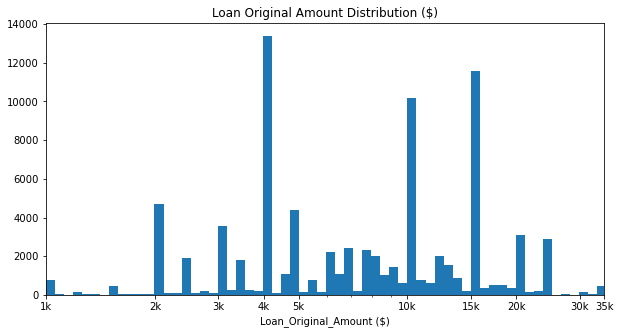

In [40]:
plt.figure(figsize =[10,5])
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(loan_subs['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_subs, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000, 35000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k','35k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan_Original_Amount ($)')
plt.title('Loan Original Amount Distribution ($)');

## Observation
> From the plot above, we can see that the most popular amounts are 4,000, 10,000 and 15,000 dollars. The upper limit is 35,000 dollars while the lower limit is 1,000 dollars. The most given out amount is 4,000 dollars

## Question 6
> As a potential borrower, I will like to have an idea of the type of loan categoty commonly given out inorder to  weigh my chances

## Visualization

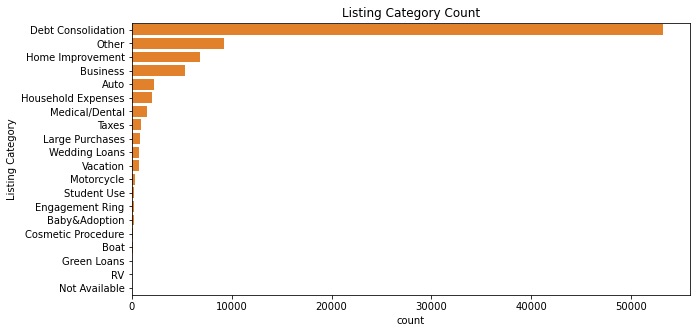

In [41]:
plt.figure(figsize = [10,5])
cat_order = loan_subs['ListingCategory'].value_counts().index
sb.countplot(data = loan_subs, y = 'ListingCategory', color =base_color, order=cat_order)
plt.ylabel('Listing Category')
plt.title('Listing Category Count');

## Observation
> As expected debt consolodation accounts for the highest amount of loans given out. This gives a prediction of the possibilities of acceptance of a loan request.

## Question 7
> I will like to find out about the income ranges that are considered for loans and those with income range with lowest chances

## Visualization

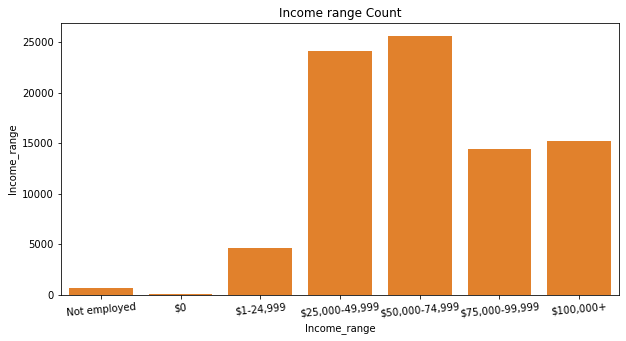

In [42]:
plt.figure(figsize = [10,5])
sb.countplot(data = loan_subs, x = 'Income_range', color =base_color)
plt.ylabel('Income_range')
plt.xticks(rotation = 5)
plt.title('Income range Count');

## Observation
> From the plot above, as expected, unemployed individuals and individuals receiving 0 dollars are not given loans. It can also be seen that income ranges greater than 25,000 dollars are more favored for loans.

## Question 8
> As a potential borrower, I will like to know about the debt-to-income ratio calculated by Prosper Loan and see the values that are accepted for loans and those not accepted.

## Visualization

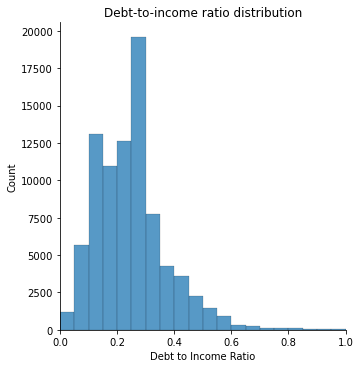

In [43]:
binsize = 0.05
bins = np.arange(0, loan_subs['DebtToIncomeRatio'].max()+binsize, binsize)
sb.displot(loan_subs['DebtToIncomeRatio'], bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1)
plt.title('Debt-to-income ratio distribution');

## Observation
> From the plot above, we can see that the debt-to-income ratio commonly accepted is <0.4. Once it is greater than 0.4, the chances of obtaining a loan reduces greatly.

## Question 9
> As a potential borrower, I will want to know if there is a need to own a home to get loans 

## Visualization

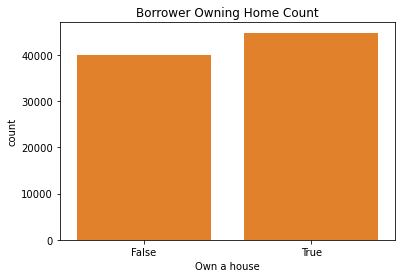

In [44]:
sb.countplot(data = loan_subs, x = 'IsBorrowerHomeowner', color =base_color)
plt.xlabel('Own a house')
plt.title('Borrower Owning Home Count');

## Observation
> We can see from the plot that more borrower own a house as a collateral but the difference is not quite significant. This means that even without owning a home, there is still a good chance of obtaining a loan.

## Question 10
> As a potential borrower, I will like to know the pattern of prosper ratings of previous borrowers

## Visualization

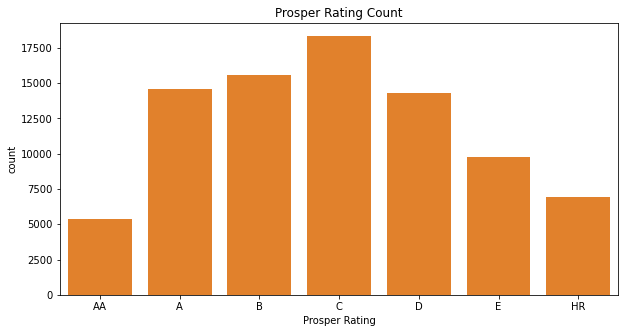

In [45]:
plt.figure(figsize = [10,5])
sb.countplot(data = loan_subs, x = 'ProsperRating', color =base_color)
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating Count');

## Observation
> Most loans were given to the individual with ratings of D and above as expected. The prosper rating could be a major determinant if a person will get a loan and it could also predict interest rate.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions observed were inline with the intuitive expectations. There were no unusual points. 
* Yes I needed to do the log transformation of the loan original amount inorder to plot it. I will like to know how the debt-to-income ratio influence the interest rate as well as employment status

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I performed some data tidying process. Firstly, I created a subset of the initial dataset.
* Then I changed the data type of the Prospect rating and income range to the ordinal categorical type. 
* I also created a dictionary of the Loan category to link the numeric keys to its string meaning
* Due to the long tails of the Loan original amount distribution, I did a log transformation to plot the histogram
* I removed the rows with null Prospect Ratings
* I filled the null debt-Income-ratio with the mean of values

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

*** I will first like to see the relationships between the numerical variables***

## Question 10
> What is the correlation between the numerical variables?

## Visualization

In [46]:
num_var = ['BorrowerRate', 'DebtToIncomeRatio','LoanOriginalAmount']

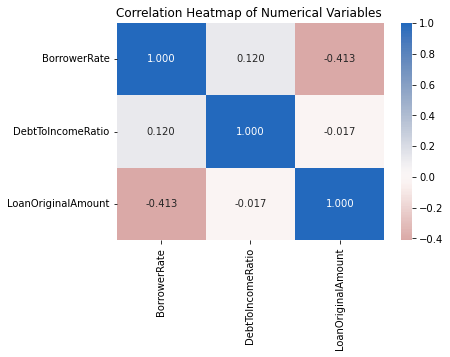

In [47]:
# the plot for correlation
sb.heatmap(loan_subs[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center=0)
plt.title('Correlation Heatmap of Numerical Variables ')
plt.show()

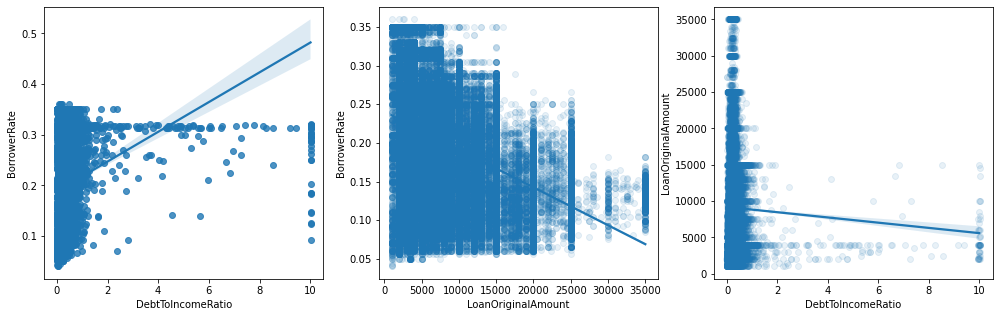

In [48]:
plt.figure(figsize =[17,5])
plt.subplot(1, 3, 1)
sb.regplot(data = loan_subs, x = 'DebtToIncomeRatio', y = 'BorrowerRate')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerRate');

plt.subplot(1, 3, 2)
sb.regplot(data = loan_subs, x = 'LoanOriginalAmount', y = 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':1/10})
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerRate');

plt.subplot(1, 3, 3)
sb.regplot(data = loan_subs, x = 'DebtToIncomeRatio', y ='LoanOriginalAmount' , x_jitter=0.04, scatter_kws={'alpha':1/10})
plt.ylabel('LoanOriginalAmount')
plt.xlabel('DebtToIncomeRatio');

## Observation
> From the plots above we can see some correlation that is interesting
* The debt to income ratio has a positive correlation with the borrower rate. This makes sense as borrowers with high debt-to-income ratio have high amount of debt and are therefore run a risk of defaulting, hence the reason for the high interest rate. The high interest rate could also be a strategy to prevent people with high debt to income ratio from obtaining loans
* Secondly, there was negative correlation between the original amount and interest rate. This means that the higher the amount of money given, the lower the interest rate
* Lastly, a negative correlation can be observed between the original loan amount and the debt to income ratio. This makes sense as the higher the debt to income ratio, the greater the risk of defaulting. Therefore, lower amount should be given to such borrower.

*** The next step is to see the relationship between the numerical variables and the categorical variables***

# Question 11
> How does the Employment status, Owning a Home, Income Range influence the Borrower Interest rate

## Visualization

C:\Users\omote\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\omote\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omote\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\omote\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, 

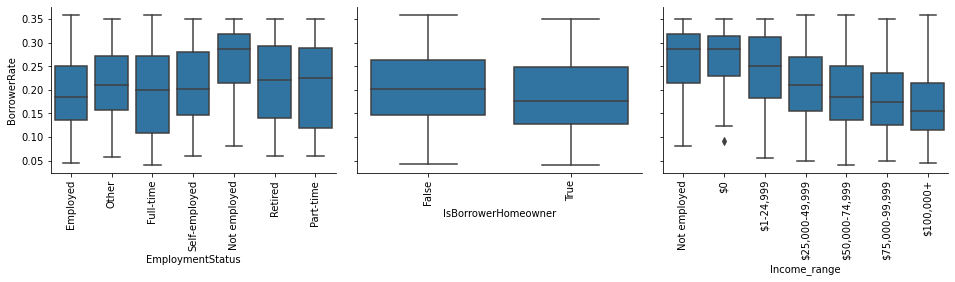

In [49]:
#define boxgrid function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);


g = sb.PairGrid(data = loan_subs, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','IsBorrowerHomeowner','Income_range'],
                size = 3, aspect = 1.5);
g.map(boxgrid);

## Observation
> From the  plot above, we see some intuitive pattern with the interest rate. This include;
* The interest rate is lower for employed individuals while it is significantly higher for unemployed borrowers. Subsequetly, it is lower for full-time employees and higher for retired and part-time employees.
* Having a house collateral results in lower interest rate while individuals without house collateral have higher interest rates
* As expected the interest rate reduces as the income range increases.

## Question 12
> How does the Prosper Rating influence the Borrower Interest Rate and Original Loan Amount

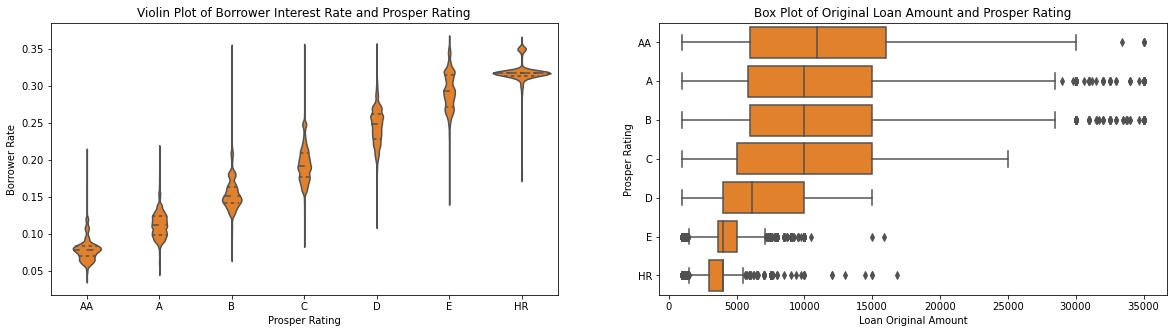

In [50]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.violinplot(data=loan_subs, x='ProsperRating', y='BorrowerRate', color= base_color, inner= 'quartile' )
plt.ylabel('Borrower Rate')
plt.xlabel('Prosper Rating')
plt.title('Violin Plot of Borrower Interest Rate and Prosper Rating')

plt.subplot(1,2,2)
sb.boxplot(data=loan_subs, y='ProsperRating', x='LoanOriginalAmount', color= base_color)
plt.ylabel('Prosper Rating')
plt.xlabel('Loan Original Amount')
plt.title('Box Plot of Original Loan Amount and Prosper Rating');

## Observation
> From the plot above, we can see that the Prosper Rating is a major predictor of the Borrower Interest rate and the initial loan amount given. 
* It is obvious that borrowers with high prosper rating (AA) have a good loan history and thus receive lower interest rate.They are also qualified for higher amount of loan. 
* Individuals with lower prosper rating (HR) do not have such history, hence higher interest rate and low loan amount.

*** To conclude bivariate visualizations, I will look at the relationship between some categorical variables***

In [51]:
loan_subs.columns

Index(['LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'DebtToIncomeRatio',
       'LoanOriginalAmount', 'IsBorrowerHomeowner', 'ProsperRating',
       'ListingCategory', 'Income_range', 'Terms'],
      dtype='object')

## Question 13
> How does the Employment and Income ranges influence the prospect rating

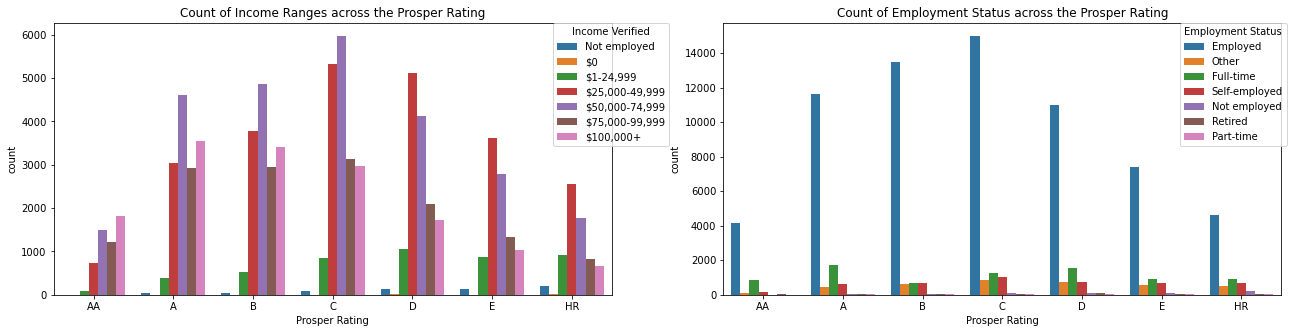

In [52]:
plt.figure(figsize= [22,5])
plt.subplot(1,2,1)
sb.countplot(data = loan_subs, x = 'ProsperRating', hue = 'Income_range')
plt.legend(bbox_to_anchor=(0.895, 1),
           borderaxespad=0, title = "Income Verified")
plt.xlabel('Prosper Rating')
plt.title('Count of Income Ranges across the Prosper Rating');

plt.subplot(1,2,2)
sb.countplot(data = loan_subs, x = 'ProsperRating', hue = 'EmploymentStatus')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Employment Status")
plt.xlabel('Prosper Rating')
plt.title('Count of Employment Status across the Prosper Rating');


## Observation
> We can see from the plot above that the prospect rating varies accross the income ranges and the various employment status. High income earners usually have good prosper rating and vice versa. Furthermore, the rating is also seen to correlate with the employment status. Individuals employed and with full time jobs have good prosper rating

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* There is a moderate positive correlation between borrower interest rate and debt to income ratio
* There is a negative correlation between borrowers interest rate and original loan amount.
* There is also a negative correlation between original loan amount and debt to income ratio.
* The interest rate is lower for employed individuals while it is significantly higher for unemployed borrowers. Subsequetly,   it is lower for full-time employees and higher for retired and part-time employees.
* Having a house collateral results in lower interest rate while individuals without house collateral have higher interest rates
* As expected the interest rate reduces as the income range increases.
* Prosper Rating is a major predictor of the Borrower Interest rate and the initial loan amount given

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes the Prosper Rating significantly influences the interest rate and the amount of loan a borrower will receive

## Multivariate Exploration

*** After completing the bivariate analysis, I found that the Prosper Rating is a good predictor of the original loan amount and the Interest rate. I will use the multivariate analysis to explore this relationship and more*** 

In [53]:
loan_subs.columns

Index(['LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'DebtToIncomeRatio',
       'LoanOriginalAmount', 'IsBorrowerHomeowner', 'ProsperRating',
       'ListingCategory', 'Income_range', 'Terms'],
      dtype='object')

In [54]:
num_var = ['BorrowerRate', 'LoanOriginalAmount', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'Income_range', 'EmploymentStatus', 'Term', 'ProsperRating', 'IsBorrowerHomeowner','ListingCategory']

## Question 14
> How does the BorrowerRate and Original Loan amount distribute accross Posper Rating?

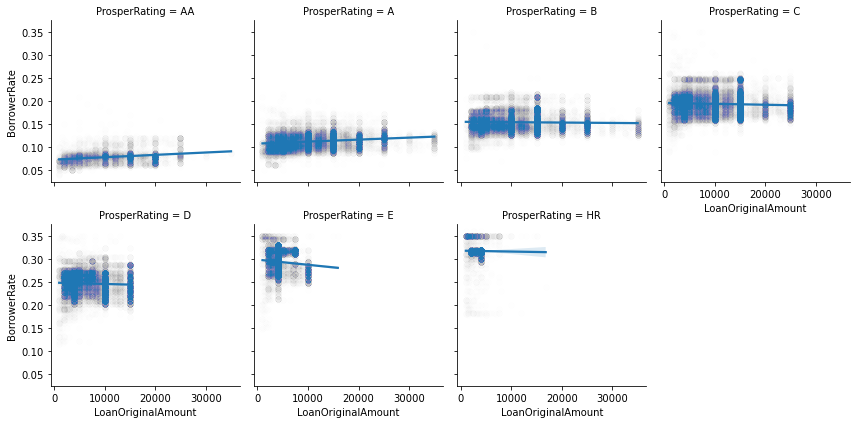

In [55]:
g = sb.FacetGrid(data = loan_subs, col = 'ProsperRating', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

## Question 15
> How does the BorrowerRate and Original Loan amount distribute accross Income range?

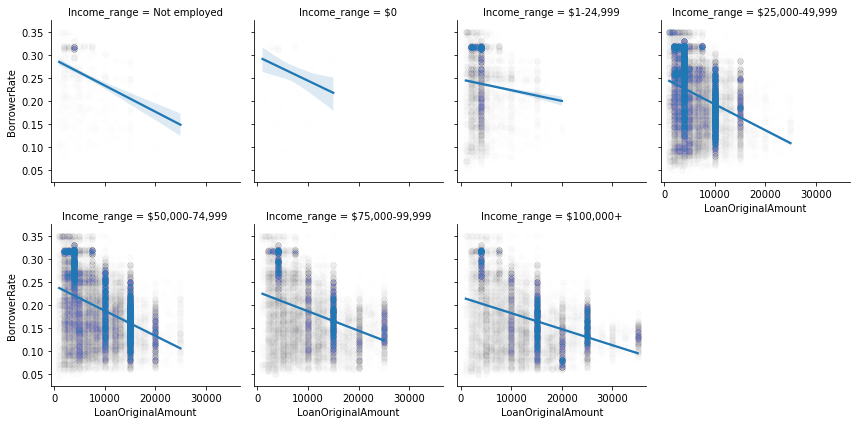

In [56]:
g = sb.FacetGrid(data = loan_subs, col = 'Income_range', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

## Observation
> From the plot above, we can also observe that as the income ranges increases, the borrower interest rate reduces and the original loan amount increases with increase income range.

## Question 16
> How does the Borrower Interest Rate and Original Loan amount distribute accross Employment Status?

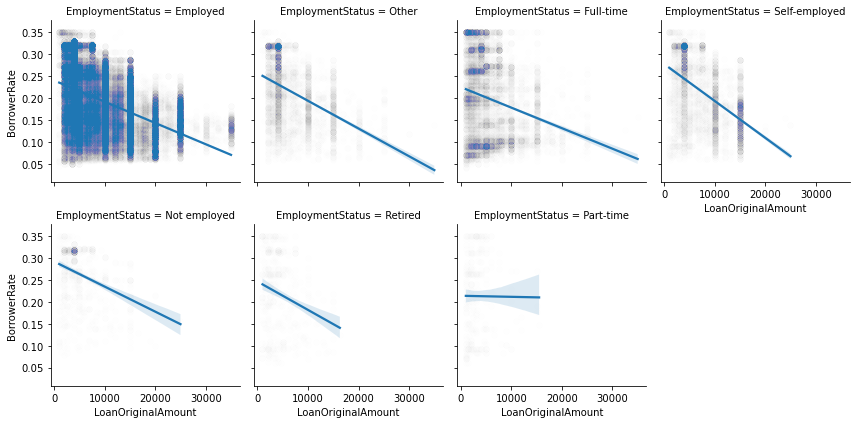

In [57]:
g = sb.FacetGrid(data = loan_subs, col = 'EmploymentStatus', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerRate', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

## Observation
> From the plot above, we can see that the employed borrowers have access to higher amount of loans as well as higher quantity of loans. In addition, we can see that the Interest rate reduces but the employment status might not significantly influence the Interest rate.

## Question 17
> How does the original loan amount change with respect to having a collateral and income ranges.

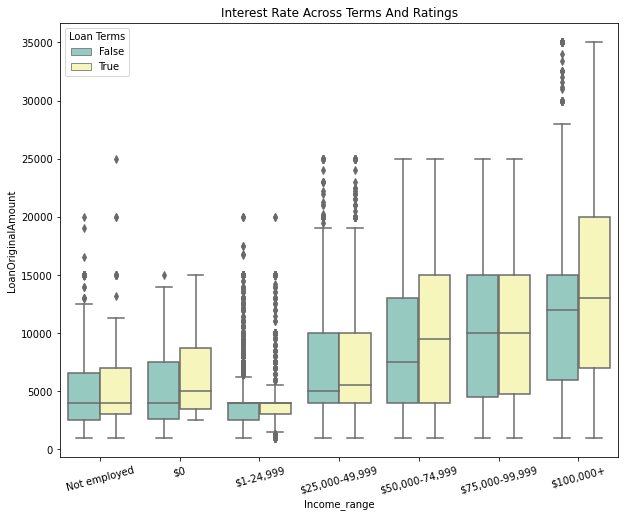

In [58]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='Income_range', y='LoanOriginalAmount', hue='IsBorrowerHomeowner',
                 data=loan_subs, palette="Set3")
plt.title('Interest Rate Across Terms And Ratings')
plt.legend(title = 'Loan Terms')
plt.xticks(rotation = 15);

## Observation
> As shown in the previous section, having a collateral and a income range help getting higher loan amount. It is clearly visible that being a home owner is a very important element to get a higher loan amount.

## Question 18
> How does the loan time affect the Interest Rate accross all the Prospect ratings with the time

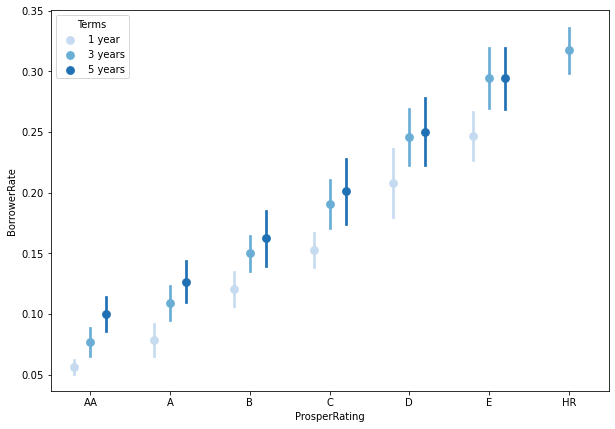

In [59]:
fig = plt.figure(figsize = [10,7])
ax = sb.pointplot(data = loan_subs, x = 'ProsperRating', y = 'BorrowerRate', hue = 'Terms',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')

## Observation
> There is an unusual observation in the above plot. Normally, The interest rate is intuitively expected to reduce with an increase in the number of years. But in the above plot the opposite is observed. Also we can see the that the interest rate increases as the prospect rating reduces.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  I observed several relationships in this dataset which I will highlight below.
* I explored the differences in the original amount and interest rate accross the prosper rating. I saw an increase in the original loan amount and a decrease in the interest rate as we move from HR to AA prospect ratings
* Then I went further to observe similar variation with Income range and Employment status
* I plotted the relationship between owning a home, income ranges and the original loan amount. I saw that having a collateral and high income increases the chances of getting a higher loan.
* I decided to check the changes in the interest rate accross the three loan timelines. I saw an interesting trend, borrowers interest rate increase with increase in the number of years which is against the normal intuitive trend.

### Were there any interesting or surprising interactions between features?

> Yes It was surprising to find out that the interest rate does not decrease across the years.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
* A borrower's rating by prosper greatly affects the chances of getting a loan. The rating also influences the interest rate i.e the higher the rating the lower the interest rate
* The higher the borrower's prosper rating, the higher the amount of loan money such individual can get
* The employment status influences the prosper rating and interest rate. Employed individuals usually have higher prosper ratings and lower interest rates
*  Whether a person has a house as a collateral or not influences the loan amount they can get. Ownership of a house increases your loan amount.
* The range of income  of an individual influences the amount of loan a borrower gets and the prosper rating. The higher the income, the higher the prosper ratings and the amount of loan that can be gotten
### Steps
* The steps taken in this exploration include; wrangling the data to make it more tidy and clean. Then I carried out Univariate, Bivariate and Multivariate Data viisualizations.

In [60]:
loan_subs.to_csv('Prosper_subset.csv')